# Introduction

In this lab, we will be using Python's Scikit-Learn library to perform Boosted Decision Tree Regression on a 1D sinusoidal dataset. We will compare the performance of a single Decision Tree Regressor with that of an AdaBoost Regressor with 300 Decision Tree Regressors as base learners.

# Preparing the data

We start by preparing dummy data with a sinusoidal relationship and some Gaussian noise. We use Numpy's **linspace()** function to create a 1D array of 100 evenly spaced values between 0 and 6. We then use the **np.newaxis** attribute to convert the 1D array to a 2D array of shape **(100,1)**. We apply the **sin()** function to this array and add a second sine wave obtained by multiplying the array by 6. We then add some Gaussian noise with a mean of 0 and standard deviation of 0.1 using Numpy's **normal()** function.

In [1]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Training and prediction with DecisionTree and AdaBoost Regressors

We now define the classifiers and fit them to the data. We define the first regressor as a **DecisionTreeRegressor** with **max_depth=4**. We define the second regressor as an **AdaBoostRegressor** with a **DecisionTreeRegressor** of **max_depth=4** as base learner. We build the AdaBoost Regressor with **n_estimators=300** of those base learners. We then fit both regressors to the data and make predictions on the same data to see how well they fit it.

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plotting the results

Finally, we plot how well our two regressors, single decision tree regressor and AdaBoost regressor, could fit the data. We use Matplotlib's **scatter()** function to plot the training samples and the predicted values from both regressors. We use Matplotlib's **plot()** function to plot the predicted values against the data for both regressors. We add a legend to the plot to distinguish between the two regressors.

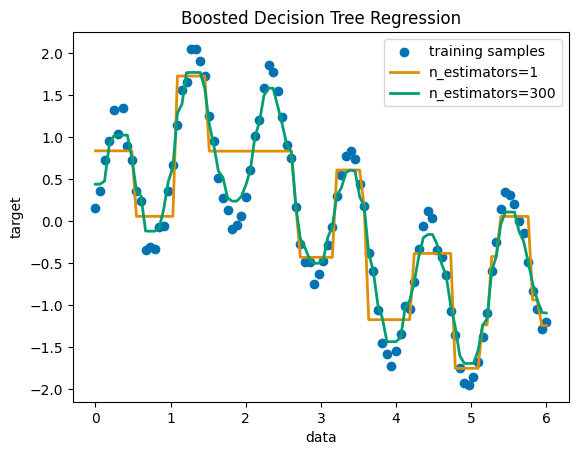

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# Summary

In this lab, we learned how to perform Boosted Decision Tree Regression on a 1D sinusoidal dataset using Python's Scikit-Learn library. We compared the performance of a single Decision Tree Regressor with that of an AdaBoost Regressor with 300 Decision Tree Regressors as base learners. We visualized the performance of both regressors using Matplotlib.